#Kaggle. Give Me Some Credit

In [1]:
import numpy as np
import pandas as pd
raw = pd.read_csv('gimme//cs-training.csv')
X = raw.ix[:,2:]
X.index = list(raw.ix[:,0])
y = raw['SeriousDlqin2yrs']
y.index = X.index
testraw = pd.read_csv('gimme//cs-test.csv')
testX = testraw.ix[:,2:]
testX.index = list(testraw.ix[:,0])

In [10]:
X[0:10]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120,13,0,6,0,2
2,0.957151,40,0,0.121876,2600,4,0,0,0,1
3,0.658180,38,1,0.085113,3042,2,1,0,0,0
4,0.233810,30,0,0.036050,3300,5,0,0,0,0
5,0.907239,49,1,0.024926,63588,7,0,1,0,0
6,0.213179,74,0,0.375607,3500,3,0,1,0,1
7,0.305682,57,0,5710.000000,NaN,8,0,3,0,0
8,0.754464,39,0,0.209940,3500,8,0,0,0,0
9,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0.189169,57,0,0.606291,23684,9,0,4,0,2


In [11]:
y[0:10]

1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: SeriousDlqin2yrs, dtype: int64

In [12]:
testX[0:10]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.885519,43,0,0.177513,5700,4,0,0,0,0
2,0.463295,57,0,0.527237,9141,15,0,4,0,2
3,0.043275,59,0,0.687648,5083,12,0,1,0,2
4,0.280308,38,1,0.925961,3200,7,0,2,0,0
5,1.000000,27,0,0.019917,3865,4,0,0,0,1
6,0.509791,63,0,0.342429,4140,4,0,0,0,1
7,0.587778,50,0,1048.000000,0,5,0,0,0,3
8,0.046149,79,1,0.369170,3301,8,0,1,0,1
9,0.013527,68,0,2024.000000,NaN,4,0,1,0,0
10,1.000000,23,98,0.000000,0,0,98,0,98,0


In [13]:
import bear.bear as br
reload(br)

<module 'bear.bear' from 'bear\bear.pyc'>

,Percentage
MonthlyIncome,0.200
NumberOfDependents,0.024


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,10000.000000,10000.00000,10000.000000,10000.000000,8005.000000,10000.000000,10000.000000,10000.000000,10000.000000,9756.000000
mean,7.117125,52.28890,0.433300,350.641706,6754.215116,8.483200,0.285300,1.009100,0.262500,0.751538
std,271.283717,14.73085,4.414669,1526.097983,12520.948753,5.222954,4.396275,1.133643,4.383756,1.105771
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030418,41.00000,0.000000,0.173834,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.160685,52.00000,0.000000,0.359862,5439.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.566368,62.25000,0.000000,0.865442,8166.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,22000.000000,101.00000,98.000000,101320.000000,835040.000000,50.000000,98.000000,29.000000,98.000000,9.000000


,Counts
0,9346
1,654


,corr,p-value
NumberOfTime30-59DaysPastDueNotWorse,0.127052,2.913163e-37
NumberOfTimes90DaysLate,0.117903,2.728273e-32
age,-0.108765,1.060832e-27
NumberOfTime60-89DaysPastDueNotWorse,0.106882,8.419343e-27
NumberOfDependents,0.050666,5.529360e-07
NumberOfOpenCreditLinesAndLoans,-0.019053,5.675064e-02
MonthlyIncome,-0.018037,1.066019e-01
DebtRatio,-0.016065,1.081888e-01
NumberRealEstateLoansOrLines,0.012863,1.983864e-01
RevolvingUtilizationOfUnsecuredLines,-0.006257,5.315387e-01


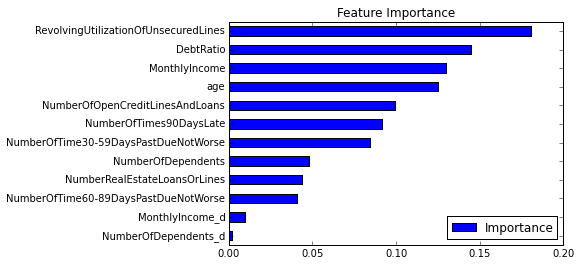

,Percentage
MonthlyIncome,0.199
NumberOfDependents,0.026


[]


[]


[]


[]


[]


[]


[]


In [14]:
%matplotlib inline
br.get_initial_analysis(X, y, testX, random_state=42)

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("imp", br.ImputeData(rows_to_scan=0.3, columns_to_impute=['MonthlyIncome', 'NumberOfDependents'])),
                 ("log", br.LogTrans()),
                 ("inter", br.AddInteraction()),
                 ("modelpred", br.ModelPredictor())])

In [17]:
from sklearn.grid_search import RandomizedSearchCV
para_RF = {'n_estimators': [200], "max_depth": range(2,20), "max_features": np.arange(0.1,0.9,0.1), "n_jobs":[-1]}
para_ExTree = {'n_estimators': [200], "max_depth": range(10,30), "max_features": np.arange(0.1,0.9,0.1), "n_jobs":[-1]}
para_LR = {'penalty': ['l1', 'l2'], 'C':np.logspace(-2,0,20)}
para_SVC = {'C': np.logspace(-2,0,20), 'probability': [True], 'kernel': ['linear']}
para_KNN = {"n_neighbors": range(200,400,20), "weights" : ['uniform', 'distance']}
para_BagTree = {'max_samples': [0.6, 0.7, 0.8, 0.9], 'n_estimators': [200]}
para_GBC = {"max_depth": range(1,7),
         "min_samples_leaf": range(2,11),
         "max_features": np.arange(0.3,0.9,0.1),
          'n_estimators': [200],
            'loss' : ['deviance', 'exponential']}
para_Cali_linear_SVC= {'C': np.logspace(-2,0,20)} 

rand_num = br.NumberGeneratorForModelPredictor(random_state=422)

paras = {
    'imp__method': ['mean', 'mode', 'max', 'median', 'knn'], #'linear_reg'],
    'log__trans_flag': [True, False],
    'inter__add_list': [[], ['RevolvingUtilizationOfUnsecuredLines','DebtRatio', 'MonthlyIncome','age','NumberOfOpenCreditLinesAndLoans']],
    'inter__degree': [[2,3], [2]],
    'modelpred__modelwithparams': [['RF', para_RF], ['LR', para_LR], 
                                 ['LDA', {}], ['Cali_linear_SVC', para_Cali_linear_SVC], #['SVC', para_SVC],
                                 ['KNN', para_KNN], ['BagTree', para_BagTree],
                                 ['ExTree', para_ExTree], ['GBC', para_GBC], ['GaussianNB', {}],  #['MultiNB', {}],
                                 ['QDA', {}]],
    'modelpred__random_number': rand_num
}
search = RandomizedSearchCV(pipe, param_distributions=paras, n_iter=50, 
                            random_state=42, cv=5,scoring='roc_auc', verbose=2)

In [18]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] modelpred__modelwithparams=['GBC', {'max_features': array([ 0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]), 'n_estimators': [200], 'loss': ['deviance', 'exponential'], 'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]}], inter__add_list=[], imp__method=median, modelpred__random_number=0.247257756749, log__trans_flag=True, inter__degree=[2, 3] 
[CV]  modelpred__modelwithparams=['GBC', {'max_features': array([ 0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]), 'n_estimators': [200], 'loss': ['deviance', 'exponential'], 'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]}], inter__add_list=[], imp__method=median, modelpred__random_number=0.247257756749, log__trans_flag=True, inter__degree=[2, 3] -  11.9s
[CV] modelpred__modelwithparams=['GBC', {'max_features': array([ 0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]), 'n_estimators': [200], 'loss': ['deviance', 'exponential'], 'max_

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   11.9s
[Parallel(n_jobs=1)]: Done  41 jobs       | elapsed:  6.2min



[CV] modelpred__modelwithparams=['GaussianNB', {}], inter__add_list=[], imp__method=median, modelpred__random_number=0.776115459829, log__trans_flag=False, inter__degree=[2] 
[CV]  modelpred__modelwithparams=['GaussianNB', {}], inter__add_list=[], imp__method=median, modelpred__random_number=0.776115459829, log__trans_flag=False, inter__degree=[2] -   0.1s
[CV] modelpred__modelwithparams=['GaussianNB', {}], inter__add_list=[], imp__method=median, modelpred__random_number=0.776115459829, log__trans_flag=False, inter__degree=[2] 
[CV]  modelpred__modelwithparams=['GaussianNB', {}], inter__add_list=[], imp__method=median, modelpred__random_number=0.776115459829, log__trans_flag=False, inter__degree=[2] -   0.1s
[CV] modelpred__modelwithparams=['GaussianNB', {}], inter__add_list=[], imp__method=median, modelpred__random_number=0.776115459829, log__trans_flag=False, inter__degree=[2] 
[CV]  modelpred__modelwithparams=['GaussianNB', {}], inter__add_list=[], imp__method=median, modelpred__ra

[Parallel(n_jobs=1)]: Done 162 jobs       | elapsed: 46.3min
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 99.5min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(steps=[('imp', ImputeData(columns_to_impute=['MonthlyIncome', 'NumberOfDependents'],
      impute_inf=True, keep_dummies=True, method='mean', rows_to_scan=0.3)), ('log', LogTrans(columns_to_trans='all', trans_flag=True)), ('inter', AddInteraction(add_list=None, degree=2)), ('modelpred', ModelPredictor(modelwithparams=None, problem_type='infer', random_number=-1))]),
          fit_params={}, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'modelpred__modelwithparams': [['RF', {'n_estimators': [200], 'max_features': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]), 'n_jobs': [-1], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}], ['LR', {'penalty': ['l1', 'l2'], 'C': array([ 0...r instance at 0x000000001F1B2BC8>, 'log__trans_flag': [True, False], 'inter__degree': [[2, 3], [2]]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          scoring='ro

In [19]:
br.report_grid_score_with_params(search.grid_scores_, 30, model_key='modelpred__modelwithparams', 
                                 random_number_key='modelpred__random_number')

Model with rank: 1
Mean validation score: 0.864 (std: 0.007)
Parameters: {'modelpred__modelwithparams': ['GBC', {'max_features': array([ 0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]), 'n_estimators': [200], 'loss': ['deviance', 'exponential'], 'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]}], 'inter__add_list': [], 'imp__method': 'median', 'modelpred__random_number': 0.24725775674949546, 'log__trans_flag': True, 'inter__degree': [2, 3]}
Parameters of the model:  {'max_features': 0.40000000000000002, 'n_estimators': 200, 'min_samples_leaf': 8, 'max_depth': 3, 'loss': 'exponential'}

Model with rank: 2
Mean validation score: 0.863 (std: 0.006)
Parameters: {'modelpred__modelwithparams': ['RF', {'n_estimators': [200], 'max_features': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]), 'n_jobs': [-1], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}], 'inter__add_list': [], 'imp__method': 'median', 'modelpred__random_number':

In [20]:
from sklearn.metrics import roc_auc_score
pred = search.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, pred)

0.86739566081540631

In [21]:
pipe2 = Pipeline([("imp", br.ImputeData(columns_to_impute=['MonthlyIncome', 'NumberOfDependents'])),
                 ("log", br.LogTrans()),
                 ("inter", br.AddInteraction()),
                 ("modelpred", br.ModelPredictor())])

In [22]:
prob1, prob2 = br.get_prediction_from_models(search.grid_scores_, pipe2, range(1,21), 
                                             X_train, y_train, X_val, cv=5, n_class=2, print_process=True)

Processing Model 1 of 20
Processing Model 2 of 20
Processing Model 3 of 20
Processing Model 4 of 20
Processing Model 5 of 20
Processing Model 6 of 20
Processing Model 7 of 20
Processing Model 8 of 20
Processing Model 9 of 20
Processing Model 10 of 20
Processing Model 11 of 20
Processing Model 12 of 20
Processing Model 13 of 20
Processing Model 14 of 20
Processing Model 15 of 20
Processing Model 16 of 20
Processing Model 17 of 20
Processing Model 18 of 20
Processing Model 19 of 20
Processing Model 20 of 20


In [23]:
from sklearn.ensemble import RandomForestClassifier
para_RF = { "max_depth": range(2,20), "max_features": np.arange(0.4,0.9,0.1)}
search2 = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1, n_estimators=200), param_distributions=para_RF, n_iter=10, 
                            random_state=42, cv=5,scoring='roc_auc', verbose=2)

In [24]:
search2.fit(prob1, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=0.5, max_depth=12 ..................................
[CV] ......................... max_features=0.5, max_depth=12 - 1.3min
[CV] max_features=0.5, max_depth=12 ..................................
[CV] ......................... max_features=0.5, max_depth=12 - 1.3min
[CV] max_features=0.5, max_depth=12 ..................................
[CV] ......................... max_features=0.5, max_depth=12 - 1.3min
[CV] max_features=0.5, max_depth=12 ..................................
[CV] ......................... max_features=0.5, max_depth=12 - 1.3min
[CV] max_features=0.5, max_depth=12 ..................................
[CV] ......................... max_features=0.5, max_depth=12 - 1.2min
[CV] max_features=0.8, max_depth=4 ...................................
[CV] .......................... max_features=0.8, max_depth=4 -  40.9s
[CV] max_features=0.8, max_depth=4 ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  41 jobs       | elapsed: 58.2min



[CV] max_features=0.6, max_depth=19 ..................................
[CV] ......................... max_features=0.6, max_depth=19 - 2.0min
[CV] max_features=0.6, max_depth=19 ..................................
[CV] ......................... max_features=0.6, max_depth=19 - 2.1min
[CV] max_features=0.6, max_depth=19 ..................................
[CV] ......................... max_features=0.6, max_depth=19 - 2.1min
[CV] max_features=0.6, max_depth=19 ..................................
[CV] ......................... max_features=0.6, max_depth=19 - 2.0min
[CV] max_features=0.7, max_depth=6 ...................................
[CV] .......................... max_features=0.7, max_depth=6 -  55.6s
[CV] max_features=0.7, max_depth=6 ...................................
[CV] .......................... max_features=0.7, max_depth=6 -  57.7s
[CV] max_features=0.7, max_depth=6 ...................................
[CV] .......................... max_features=0.7, max_depth=6 -  55.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 71.2min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_features': array([ 0.4,  0.5,  0.6,  0.7,  0.8]), 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          scoring='roc_auc', verbose=2)

In [25]:
from sklearn.metrics import roc_auc_score
pred = search2.predict_proba(prob2)[:, 1]
roc_auc_score(y_val, pred)

0.867722139898228

In [26]:
prob1, prob2 = br.get_prediction_from_models(search.grid_scores_, pipe2, range(1,21), 
                                             X, y, testX, cv=5, n_class=2, print_process=True)

Processing Model 1 of 20
Processing Model 2 of 20
Processing Model 3 of 20
Processing Model 4 of 20
Processing Model 5 of 20
Processing Model 6 of 20
Processing Model 7 of 20
Processing Model 8 of 20
Processing Model 9 of 20
Processing Model 10 of 20
Processing Model 11 of 20
Processing Model 12 of 20
Processing Model 13 of 20
Processing Model 14 of 20
Processing Model 15 of 20
Processing Model 16 of 20
Processing Model 17 of 20
Processing Model 18 of 20
Processing Model 19 of 20
Processing Model 20 of 20


In [27]:
rfb = search2.best_estimator_
rfb.fit(prob1, y)
finalpred = rfb.predict_proba(prob2)[:,1]

In [28]:
predfinal = pd.Series(finalpred, name='Probability', index=testX.index)
predfinal.to_csv('credit_sub_1.csv', header=True, index_label='Id')

#(using stacking)
#c-stat 0.867913
#rank 62/925